### Important libraries

In [1]:
import numpy as np
from collections import Counter
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.utils import shuffle

###  3 Distance Measures

In [2]:
# 0
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [3]:
# 1
def manhattan_distance(x1, x2):
 return np.sum(np.abs(x1 - x2))

In [4]:
# 2
def Cosine_similarity(x1, x2):
    dot_product = np.dot(x1, x2)
    norm_x1 = np.linalg.norm(x1)
    norm_x2 = np.linalg.norm(x2)
    cosine_similarity = dot_product // (norm_x1 * norm_x2)
    return (1 - cosine_similarity)

### KNN implementation

In [5]:
class KNN:
    # default value is 3
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y,typ):
        self.X_train = X
        self.y_train = y
        self.typp = typ

    # Take all x test
    def predict(self, X):
        # pass every element in c test vector to _predict()
        predictions = [self._predict(x) for x in X]
        return predictions

    # Helper function
    # calculate x point , one single data point to all the distances and then return the label based on the k-nn
    def _predict(self, x):
      if self.typp == 0:
        # compute the distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k] # here we sort the distances and pick the nearst k
        k_nearest_labels = [self.y_train[i] for i in k_indices] # here we get the labels of the k nearst distances

        # majority vote
        # counter is a function that count how many times the k_nearsest_labels appeared
        # and it will be something like that i.e [{1 : 4} , {2 : 2} , ... ] this means that class 1 appeared 4 times
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

      elif self.typp == 1:
        # compute the distance
        distances = [manhattan_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
      elif self.typp == 2:
        # compute the distance
        distances = [Cosine_similarity(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

### Load Data
note: in order to make this run you have to upload the iris data as excel

In [6]:
iris = pd.read_csv("Iris.csv")

randamize the data

In [7]:
# Randomize the Data
randomized_iris = shuffle(iris)

# Reset index -> it's not necessary  -> creates a new DataFrame where the index is sequential from 0
# in other words rest index added a new column in the left and start to count
randomized_iris.reset_index(drop=True, inplace=True)

print(randomized_iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0  40            5.1           3.4            1.5           0.2   
1  70            5.6           2.5            3.9           1.1   
2  36            5.0           3.2            1.2           0.2   
3  25            4.8           3.4            1.9           0.2   
4  11            5.4           3.7            1.5           0.2   

           Species  
0      Iris-setosa  
1  Iris-versicolor  
2      Iris-setosa  
3      Iris-setosa  
4      Iris-setosa  


### Exploratory Data Analysis

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0  40            5.1           3.4            1.5           0.2   
1  70            5.6           2.5            3.9           1.1   
2  36            5.0           3.2            1.2           0.2   
3  25            4.8           3.4            1.9           0.2   
4  11            5.4           3.7            1.5           0.2   

           Species  
0      Iris-setosa  
1  Iris-versicolor  
2      Iris-setosa  
3      Iris-setosa  
4      Iris-setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64

<function seaborn.regression.lmplot(data, *, x=None, y=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None)>

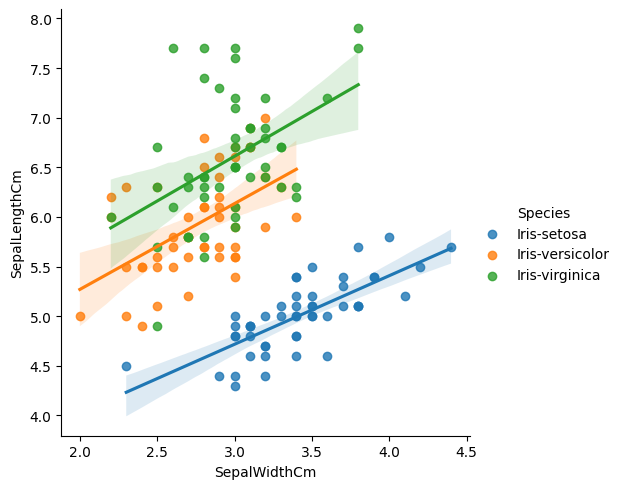

In [8]:
print(randomized_iris.head())

randomized_iris.info()

randomized_iris.describe()

# Prepare 2 scatter plots - sepal_width vs sepal_length and petal_width vs petal_length
sns.lmplot(x="SepalWidthCm", y="SepalLengthCm", hue="Species", data=iris)
sns.lmplot

In [9]:
iris['Species'].replace({'Iris-setosa':1.0,'Iris-versicolor':2.0,'Iris-virginica':3.0},inplace = True)

In [10]:
# Split the data into training and testing sets
X = randomized_iris.drop(['Species' , 'Id'], axis=1)
y = randomized_iris['Species']
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5000)

testing the euclidean_distance



In [12]:
clf = KNN(k=5)
clf.fit(X_train, y_train,0)

predictions = clf.predict(X_test)
predictions = np.array(predictions)

acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.9777777777777777


testing the manhattan distance

In [13]:
clf = KNN(k=5)
clf.fit(X_train, y_train,1)

predictions = clf.predict(X_test)
predictions = np.array(predictions)

acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.9777777777777777


testing the Cosine_similarity

In [14]:
clf = KNN(k=5)
clf.fit(X_train, y_train,2)

predictions = clf.predict(X_test)
predictions = np.array(predictions)

acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.3111111111111111


function to test given features

In [15]:
# k_number and method are integers
# features are 2d np.array
def predict_given_features(k_number,method,features):
  clf = KNN(k_number)
  clf.fit(X_train, y_train,method)
  predictions = clf.predict(features)
  predictions = np.array(predictions)
  return predictions

in this section i give the knn a certain set of features that i know that this features belongs to a certain class and then test the algorithm

In [16]:
# k_number and method are integers
# features are 2d np.array
x_p = np.array([4.4,3.2,1.3,0.2],ndmin=2) # to test random features
# euclidean_distance
predict_features = predict_given_features(5,0,x_p)
print(predict_features)
# Manhattan
predict_features = predict_given_features(5,1,x_p)
print(predict_features)
# cosine similarity
predict_features = predict_given_features(5,2,x_p)
print(predict_features)

['Iris-setosa']
['Iris-setosa']
['Iris-setosa']
